This is a script to plot the data availability in a Gantt Chart.

             Data       Start      Finish       Type
0       Landsat 8  11/04/2013  31/12/2018    Optical
1       Landsat 7  01/01/1999  31/12/2018    Optical
2       Landsat 5  01/01/1984  05/05/2012    Optical
3     Sentinel-2A  23/06/2015  31/12/2018    Optical
4     Sentinel-2B  07/03/2017  31/12/2018    Optical
5  Arealstatistik  01/01/2013  31/12/2018  Reference
6  Arealstatistik  01/01/1979  31/12/1985  Reference
7  Arealstatistik  01/01/1992  31/12/1997  Reference
8  Arealstatistik  01/01/2004  31/12/2009  Reference


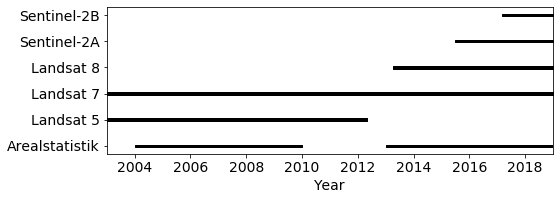

In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from matplotlib.dates import date2num,num2date
import numpy as np

# load data and display it
df = pd.read_csv('data.csv')
print(df)


# convert the start and finish dates to nums
# calculate difference
date_format = "%d/%m/%Y"
df['Diff'] = 0
for index, row in df.iterrows():
    start = date2num(datetime.strptime(row['Start'], date_format))
    finish = date2num(datetime.strptime(row['Finish'], date_format))
    df.at[index,'Start'] = start
    df.at[index,'Finish'] = finish
    df.at[index,'Diff'] = finish-start
    
# set colors for types of data
color = {"Optical":"black", "Reference":"black"}

# create figure
plt.rcParams.update({'font.size': 14})
fig,ax=plt.subplots(figsize=(8,3))

# add all bars to the plot
labels=[]
for i, task in enumerate(df.groupby("Data")):
    labels.append(task[0])
    for r in task[1].groupby("Type"):
        data = r[1][["Start", "Diff"]]
        ax.broken_barh(data.values, (i-0.05,0.1), color=color[r[0]] )

# set labels for y axis
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)

# define ticks and labels
dates = [
    '01/01/2004',
    '01/01/2006',
    '01/01/2008',
    '01/01/2010',
    '01/01/2012',
    '01/01/2014',
    '01/01/2016',
    '01/01/2018'
]
x = [date2num(dt.datetime.strptime(d,'%m/%d/%Y')) for d in dates]
ax.set_xticks(x)
labels = [num2date(num).strftime("%Y") for num in plt.xticks()[0] ]
ax.set_xticklabels(labels)

# define x limits (ticks and labels might have to be adjusted)
limits = ['01/01/2003','01/01/2019']
limits = [date2num(dt.datetime.strptime(d,'%m/%d/%Y')) for d in limits]
plt.xlim(limits[0],limits[1])

# set x axis title
ax.set_xlabel("Year")

plt.tight_layout()
plt.savefig('data_availability.png', dpi=300, bbox_inches='tight')
plt.show()



This is a script to plot the scene availability for different sensors

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from matplotlib.dates import date2num,num2date
import numpy as np